In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import FileLink
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr
from functools import reduce
import pandas.core.algorithms as algos
import time
import random
import category_encoders as ce
import shap
print(shap.__version__)
import sklearn
print(sklearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,cross_val_predict
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import graphviz
from sklearn import tree
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_theme(style="darkgrid")

0.39.0
0.23.2


# Path where the input and output located

In [2]:
project_path = "C:\\Users\\chien\\Desktop\\CREDIT_SCORE_PROJECT\\"
in_data = project_path + "DATA\\"
image_path = project_path + "IMAGE\\"

In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(image_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Read the Data

In [4]:
data = pd.read_csv(in_data + "heloc_dataset_v1.csv")
data.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


# Check the Data Type
- Check and update the data type accordingly

In [5]:
#TO CHECK THE DATA TYPE MATCH WITH DATA DICTIONARY
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [6]:
#USING DICTIONARY TO CONVERT THE DATA TYPE OF SPECIFC COLUMNS
convert_dict = {'MaxDelq2PublicRecLast12M': object,
                'MaxDelqEver': object}
data_2 = data.astype(convert_dict)
data_2.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M              object
MaxDelqEver                           object
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

In [7]:
#IDENTIFY CATEGORICAL AND NUMERICAL VARIABLES
cols = data_2.columns
target = ['RiskPerformance']
num_cols = [x for x in data_2._get_numeric_data().columns if x not in target]
cat_cols = list(set(cols)-set(num_cols)-set(target))
print(num_cols)
print(cat_cols)

['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
['MaxDelqEver', 'MaxDelq2PublicRecLast12M']


# Convert Target to 0/1

In [8]:
data_2['target'] = data_2['RiskPerformance'].apply(lambda x: 1 if x == 'Bad' else 0)

# Univariate Analysis
- Numerical Variable: Histogram
- Categorical Variable: Frequency Plot

In [9]:
# OUTPUT THE SUMMARY STATISTICS FOR NUMERICAL VAR TO CSV
data_2.describe().to_csv("summary_statistics.csv")
FileLink("summary_statistics.csv")

C:\Users\chien\OneDrive\Credit Score\Script\summary_statistics.csv

array([[<AxesSubplot:title={'center':'ExternalRiskEstimate'}>,
        <AxesSubplot:title={'center':'MSinceOldestTradeOpen'}>,
        <AxesSubplot:title={'center':'MSinceMostRecentTradeOpen'}>,
        <AxesSubplot:title={'center':'AverageMInFile'}>,
        <AxesSubplot:title={'center':'NumSatisfactoryTrades'}>],
       [<AxesSubplot:title={'center':'NumTrades60Ever2DerogPubRec'}>,
        <AxesSubplot:title={'center':'NumTrades90Ever2DerogPubRec'}>,
        <AxesSubplot:title={'center':'PercentTradesNeverDelq'}>,
        <AxesSubplot:title={'center':'MSinceMostRecentDelq'}>,
        <AxesSubplot:title={'center':'NumTotalTrades'}>],
       [<AxesSubplot:title={'center':'NumTradesOpeninLast12M'}>,
        <AxesSubplot:title={'center':'PercentInstallTrades'}>,
        <AxesSubplot:title={'center':'MSinceMostRecentInqexcl7days'}>,
        <AxesSubplot:title={'center':'NumInqLast6M'}>,
        <AxesSubplot:title={'center':'NumInqLast6Mexcl7days'}>],
       [<AxesSubplot:title={'center':'

Saving figure attributes_histogram_plots


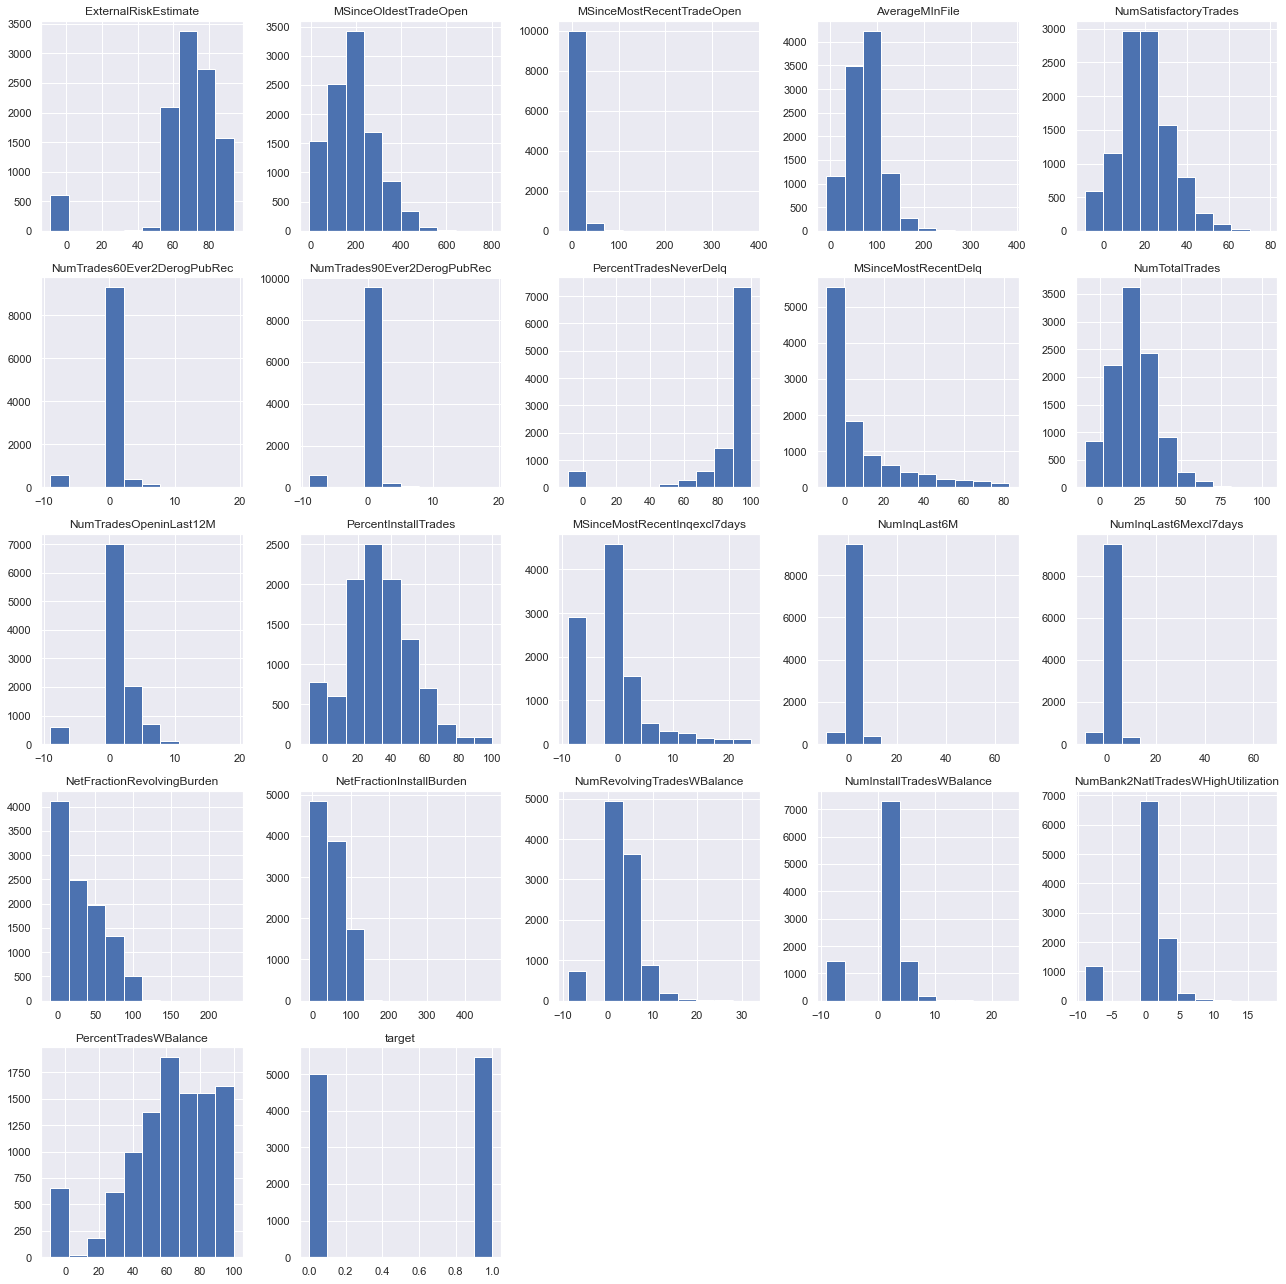

In [10]:
#HISTOGRAM FOR NUMERICAL VARIABLE
data_2.hist(figsize=(18, 18))
save_fig("attributes_histogram_plots")

In [11]:
#FREQUENCY DISTRIBUTION FOR CATEGORICAL VARIABLE
def cat_grp_by(df, grp_col, target):
    df_grp_by= df.groupby([grp_col]).agg({target:'count'})[[target]]\
    .apply(lambda x: 100*x/x.sum())\
    .sort_values(by=[grp_col],ascending=[False])
    df_grp_by.rename({target: 'FREQUENCY DISTRIBUTION %'}, axis=1, inplace=True)
    return df_grp_by

In [12]:
cat_grp_by(data_2, 'MaxDelqEver', 'RiskPerformance')
cat_grp_by(data_2, 'MaxDelq2PublicRecLast12M', 'RiskPerformance')

,FREQUENCY DISTRIBUTION %
MaxDelqEver,
8,43.331102
7,1.262071
6,27.421360
5,9.255187
4,3.069127
3,2.973516
2,7.065685
-9,5.621952


,FREQUENCY DISTRIBUTION %
MaxDelq2PublicRecLast12M,
9,0.057367
7,40.376709
6,29.897696
5,2.256430
4,15.412563
3,2.141696
2,0.506741
1,0.516302
0,3.212544


(-10.0, 9.0)

([<matplotlib.axis.XTick at 0x222bcb7a610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<BarContainer object of 8 artists>

Text(0.5, 0, 'MaxDelqEver')

Text(0, 0.5, 'Frequency in Percentage')

Saving figure Univariate MaxDelqEver


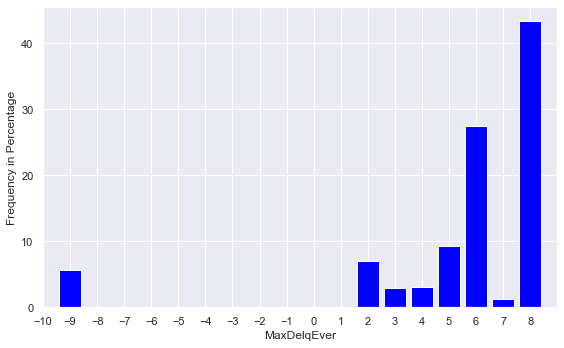

In [13]:
# CREATE BAR CHART
fig = plt.figure(figsize = (8, 5))
df = cat_grp_by(data_2, 'MaxDelqEver', 'RiskPerformance')
plt.xlim([-10, 9])
plt.xticks(np.arange(-10,9,1))
plt.bar(df.index, df['FREQUENCY DISTRIBUTION %'], color ='blue',width = 0.8)
plt.xlabel("MaxDelqEver")
plt.ylabel("Frequency in Percentage")
save_fig("Univariate MaxDelqEver")

(-10.0, 10.0)

([<matplotlib.axis.XTick at 0x222bcbf1fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<BarContainer object of 10 artists>

Text(0.5, 0, 'MaxDelq2PublicRecLast12M')

Text(0, 0.5, 'Frequency in Percentage')

Saving figure Univariate MaxDelq2PublicRecLast12M


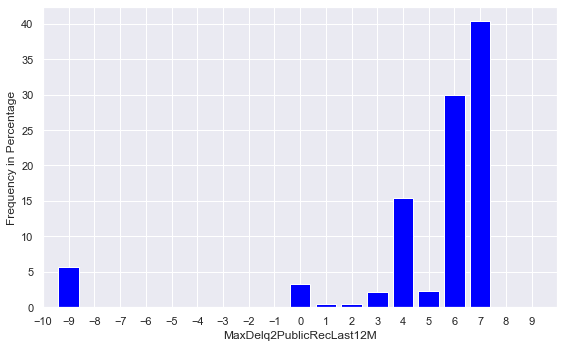

In [14]:
# CREATE BAR CHART
fig = plt.figure(figsize = (8, 5))
df = cat_grp_by(data_2, 'MaxDelq2PublicRecLast12M', 'RiskPerformance')
plt.xlim([-10, 10])
plt.xticks(np.arange(-10,10,1))
plt.bar(df.index, df['FREQUENCY DISTRIBUTION %'], color ='blue',width = 0.8)
plt.xlabel("MaxDelq2PublicRecLast12M")
plt.ylabel("Frequency in Percentage")
save_fig("Univariate MaxDelq2PublicRecLast12M")

# Bivariate Analysis
- Histogram: Numerical Variable vs target
- Bar chart: Categorical Variable vs target
- Correlation Heat Map
- Scatter plot: Relationship between numerical variables

In [15]:
def bi_hist (df, visual_col):
    sns.histplot(data = df ,x = visual_col ,color = 'navy' ,kde = True ,alpha = 1 ,bins = 30 ,hue = 'RiskPerformance')
    return

Saving figure Bivariate Histogram ExternalRiskEstimate


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram MSinceOldestTradeOpen


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram MSinceMostRecentTradeOpen


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram AverageMInFile


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumSatisfactoryTrades


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumTrades60Ever2DerogPubRec


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumTrades90Ever2DerogPubRec


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram PercentTradesNeverDelq


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram MSinceMostRecentDelq


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumTotalTrades


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumTradesOpeninLast12M


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram PercentInstallTrades


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram MSinceMostRecentInqexcl7days


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumInqLast6M


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumInqLast6Mexcl7days


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NetFractionRevolvingBurden


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NetFractionInstallBurden


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumRevolvingTradesWBalance


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumInstallTradesWBalance


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram NumBank2NatlTradesWHighUtilization


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

Saving figure Bivariate Histogram PercentTradesWBalance


<Figure size 432x288 with 0 Axes>

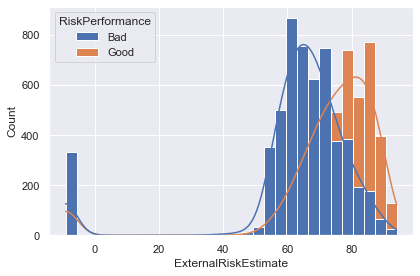

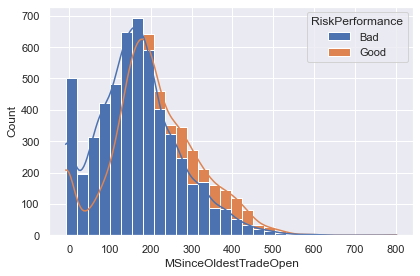

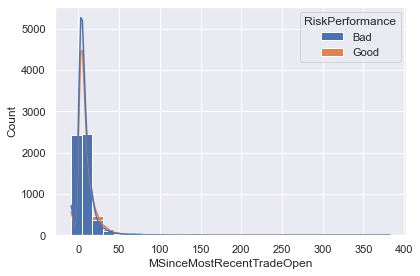

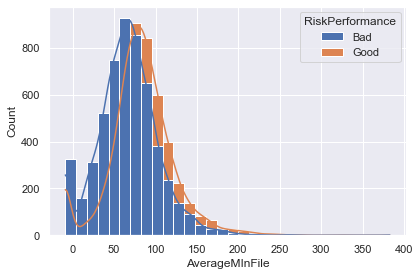

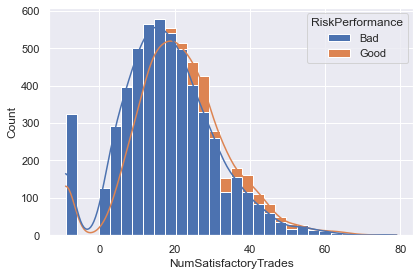

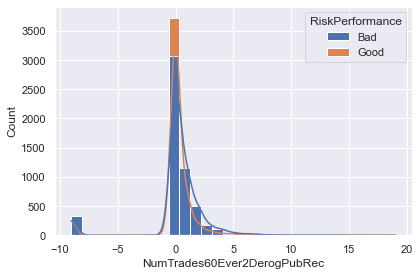

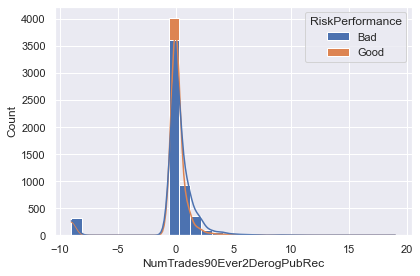

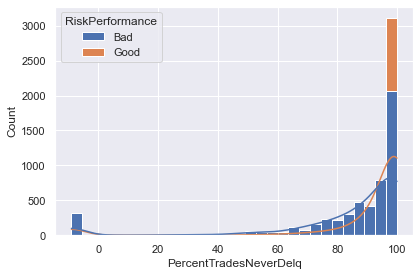

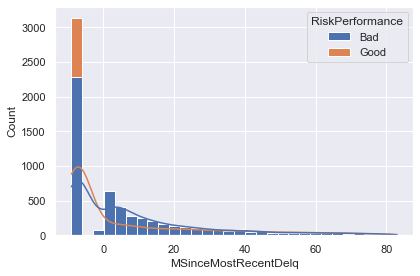

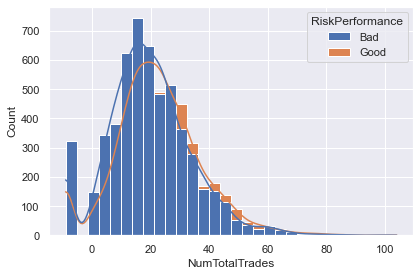

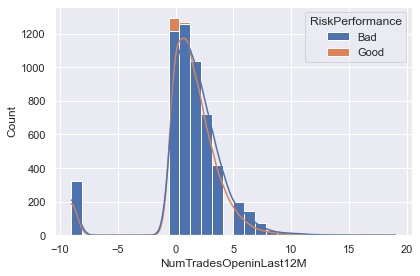

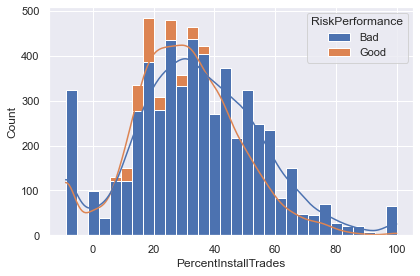

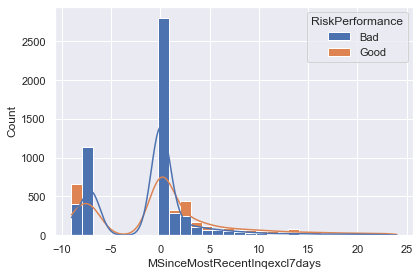

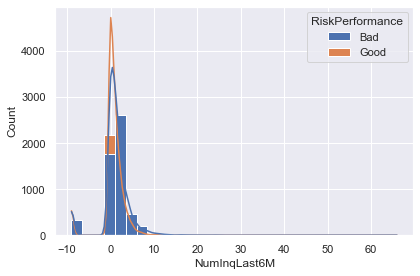

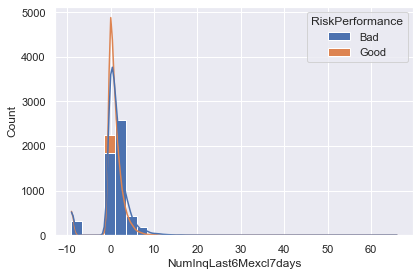

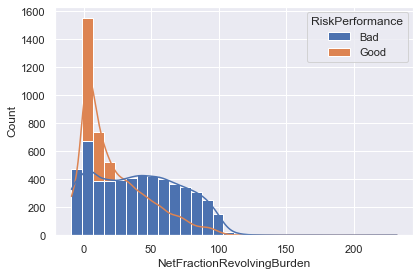

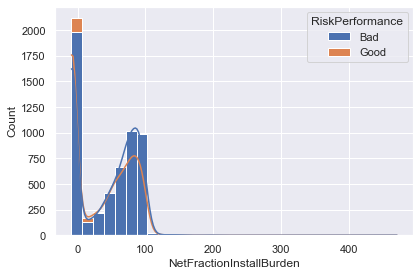

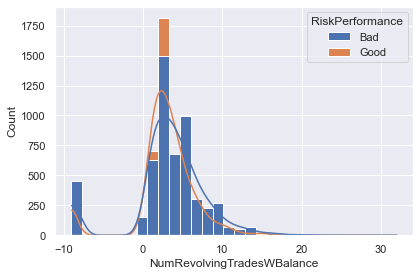

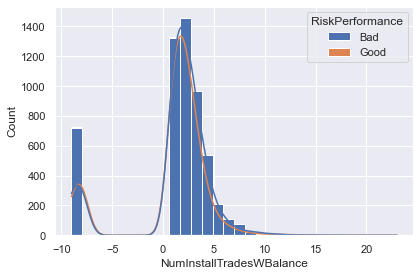

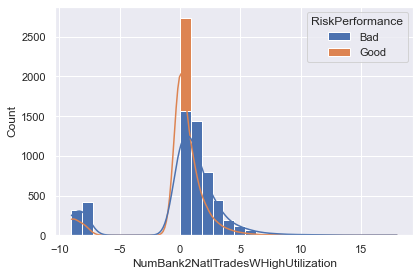

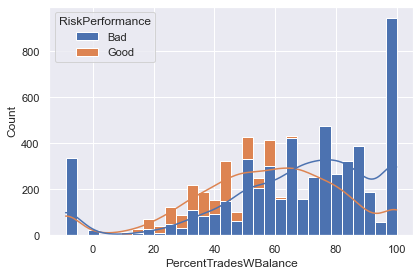

<Figure size 432x288 with 0 Axes>

In [16]:
for x in num_cols:
    bi_hist (data_2, x)
    save_fig("Bivariate Histogram " + x)
    plt.figure()

Saving figure Bivariate Bar Chart MaxDelqEver


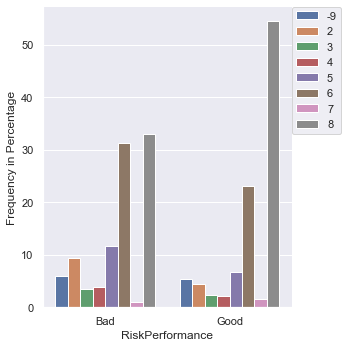

In [17]:
x,y = 'RiskPerformance', 'MaxDelqEver'

(data_2
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Frequency in Percentage')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Frequency in Percentage',hue=y,kind='bar',legend=False))
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.)
save_fig("Bivariate Bar Chart " + y)

Saving figure Bivariate Bar Chart MaxDelq2PublicRecLast12M


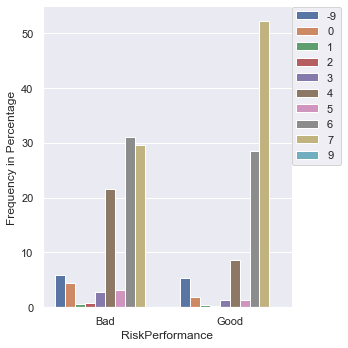

In [18]:
x,y = 'RiskPerformance', 'MaxDelq2PublicRecLast12M'

(data_2
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Frequency in Percentage')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Frequency in Percentage',hue=y,kind='bar',legend=False))
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.)
save_fig("Bivariate Bar Chart " + y)

# Correlation Heatmap

<AxesSubplot:>

Saving figure Correlation Heatmap


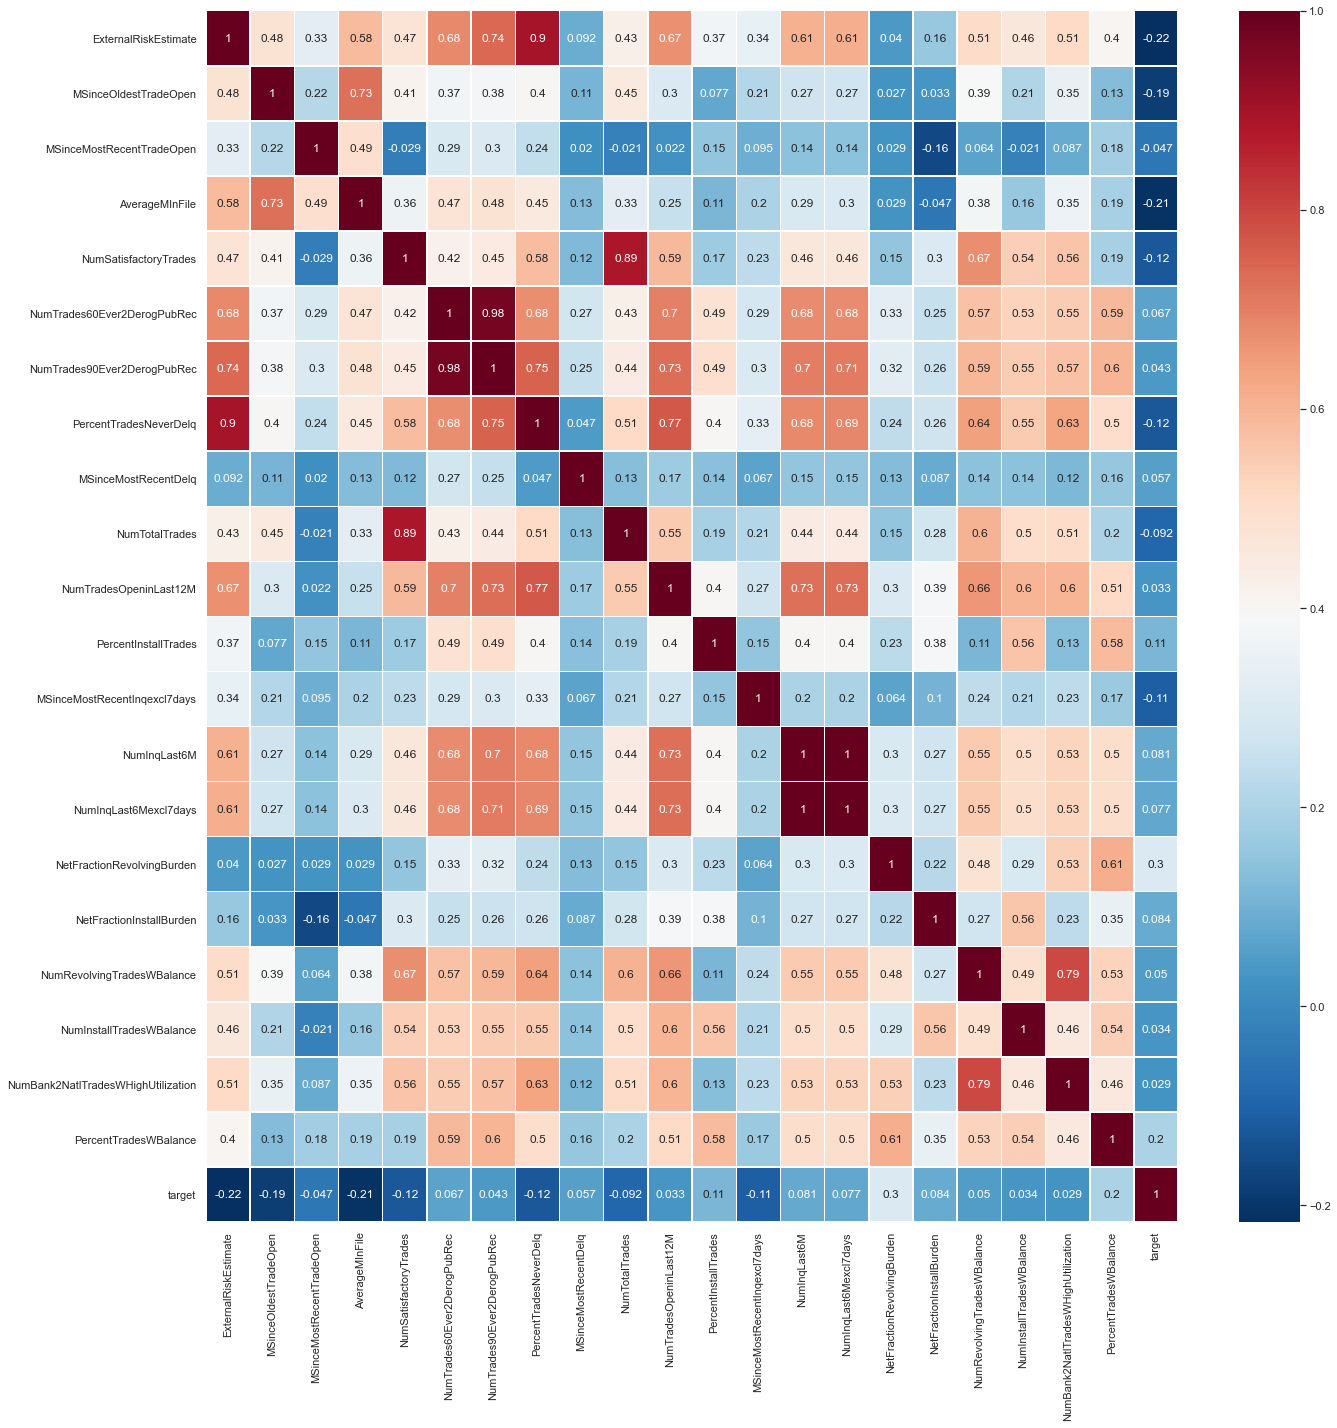

In [19]:
pearsoncorr = data_2.corr(method ='pearson')
fig = plt.figure(figsize = (20, 20))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
save_fig("Correlation Heatmap")

# Scatter Plot

In [20]:
def scatter_plt (df, var1, var2):
    corr,_ = pearsonr(df[var1], df[var2])
    corr
    sns.scatterplot(x=var1, y=var2, hue = 'RiskPerformance', data=df)
    plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)
    plt.tight_layout()
    save_fig("Scatter Plot " + var1 + " vs " + var2)
    return corr

Saving figure Scatter Plot NumTotalTrades vs ExternalRiskEstimate


0.4286620403347068

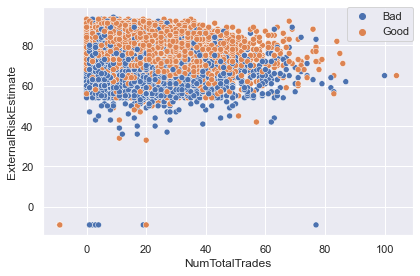

In [21]:
scatter_plt(data_2, 'NumTotalTrades','ExternalRiskEstimate')

Saving figure Scatter Plot NumInqLast6M vs MSinceMostRecentTradeOpen


0.14092560331716242

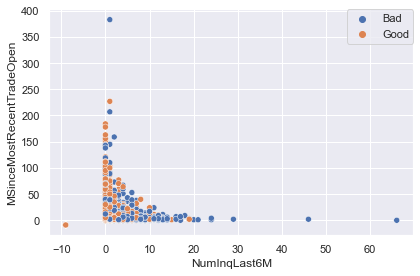

In [22]:
scatter_plt(data_2,'NumInqLast6M','MSinceMostRecentTradeOpen')

Saving figure Scatter Plot ExternalRiskEstimate vs NumInstallTradesWBalance


0.462768345437845

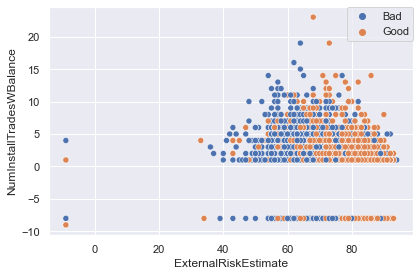

In [23]:
scatter_plt(data_2,'ExternalRiskEstimate','NumInstallTradesWBalance')

# Data Cleansing
- Check for missing values
- Handle special values: -9 for new to bureau

In [24]:
data_2.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
target                                0


In [25]:
#CHECK NEW TO BUREAU CUSTOMER'S SCORE FOR OTHER VARIABLES
new_to_bureau = data_2[data_2['ExternalRiskEstimate'] ==-9]
spe_val = []
col_nm = []
for col in new_to_bureau.columns:
    if col not in target and col not in ['ExternalRiskEstimate','RiskPerformance','target']:
        cnt_9 = new_to_bureau[new_to_bureau[col]!=-9][[col]].count()[0]
        spe_val.append(cnt_9)
        col_nm.append(col)
        
spe_val_df = pd.DataFrame(list(zip(col_nm, spe_val)),columns =['COLUMN', 'COUNT'])
spe_val_df.to_csv("New to bureau.csv", index = False)
FileLink("New to bureau.csv")

C:\Users\chien\OneDrive\Credit Score\Script\New to bureau.csv

In [26]:
#CLEANED UP DATA FOR NEW TO BUREAU CUSTOMER
index_new = data_2[data_2['ExternalRiskEstimate'] ==-9].index
data_3 = data_2
for i in range(len(col_nm)):
    for a in range(len(index_new)):
        data_3.at[index_new[a],col_nm[i]] = -9

# Feature Engineering
- Drop redundant columns
- Monotonic binning for numerical variables

In [27]:
#DROP UNWANTED COLUMNS
drop_col = ['NumInqLast6M','RiskPerformance']
data_ana = data_3.drop(drop_col, axis=1)


cols = data_ana.columns
target = ['RiskPerformance','target']
num_cols = [x for x in data_ana._get_numeric_data().columns if x not in target]
cat_cols = list(set(cols)-set(num_cols)-set(target))
print(num_cols)
print(cat_cols)
len(num_cols+cat_cols)

['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
['MaxDelqEver', 'MaxDelq2PublicRecLast12M']


22

# Check on Monotonic Binning
- https://stackoverflow.com/questions/52313838/pd-qcut-is-returning-negative-values

In [28]:
#https://pbpython.com/pandas-qcut-cut.html
#include_lowest paramete to define whether or not the first bin should include all of the lowest values.
#include.lowest = TRUE to make sure that the minimum value (here: -10) is part of the interval.
#https://cemsarier.github.io/algorithm/credit%20scoring/scorecard/woe_binning/
#https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

def woe_bin(i,no_bins):
    Y = 'target'
    X = num_cols[i]
    set_other = data_ana[(data_ana[X]!=-7)&(data_ana[X]!=-8)&(data_ana[X]!=-9)][[Y,X]]
    bins = algos.quantile(set_other[[X]], np.linspace(0, 1, no_bins))
    d1 = pd.DataFrame({"X": set_other[X], "Y": set_other[Y], "BUCKET": pd.cut(set_other[X], np.unique(bins),include_lowest=True)})
    d2 = d1.groupby('BUCKET')
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = num_cols[i]
    d3 = d3[['VAR_NAME','MIN_VALUE','MAX_VALUE','COUNT','EVENT','NONEVENT','EVENT_RATE','NON_EVENT_RATE','DIST_EVENT',\
             'DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    return d3

In [29]:
# USE LIST TO STORE DATA
# CHECK ON THE EVENT DISTRIBUTION AND WOE ON THE BINNING
data_woe = []
for i in range(len(num_cols)):
    data_woe.append(woe_bin(i,5))

data_woe_full = pd.concat(data_woe, ignore_index=True)
data_woe_full.to_csv("woe_num.csv")
FileLink("woe_num.csv")

C:\Users\chien\OneDrive\Credit Score\Script\woe_num.csv

In [30]:
#VARIABLES THAT NEED SPECIAL HANDELING

#TO STORE THE BINNED DATA
data_new_regrp = []
Y= 'target'

#BINNING
def data_subset(X):
    set_other = data_ana[(data_ana[X]!=-7)&(data_ana[X]!=-8)&(data_ana[X]!=-9)][[X,Y]]
    return set_other

def rebinning (X, new_name, conditions, values):
    set_other = data_ana[(data_ana[X]!=-7)&(data_ana[X]!=-8)&(data_ana[X]!=-9)][[X,Y]]
    set_other[new_name] = np.select(conditions, values)
    min_value = set_other[X].min()
    max_value = data_ana[X].max()
    return min_value, max_value, set_other

In [31]:
#FIRST VARIABLE
new_bin_grp_nm = 'NUM_ACCT_EVER90'
bin_var = 'NumTrades90Ever2DerogPubRec'
rules = [(data_subset(bin_var)[bin_var] == 0),
         (data_subset(bin_var)[bin_var] == 1),
         (data_subset(bin_var)[bin_var] >= 2)]
bin_grp = ['0', '1', '>2']
min_val, max_val, out_bin = rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
min_val, max_val
out_bin.groupby(new_bin_grp_nm)[Y].count()
data_new_regrp.append(out_bin)

(0, 19)

NUM_ACCT_EVER90
0     7635
1     1433
>2     793
Name: target, dtype: int64

In [32]:
#SECOND VARIABLE
new_bin_grp_nm = 'NUM_ACCT_EVER60'
bin_var = 'NumTrades60Ever2DerogPubRec'
rules = [(data_subset(bin_var)[bin_var] == 0),
         (data_subset(bin_var)[bin_var] == 1),
         (data_subset(bin_var)[bin_var] >= 2)]
bin_grp = ['0', '1', '>2']
min_val, max_val, out_bin = rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
min_val, max_val
out_bin.groupby(new_bin_grp_nm)[Y].count()
data_new_regrp.append(out_bin)

(0, 19)

NUM_ACCT_EVER60
0     6798
1     1799
>2    1264
Name: target, dtype: int64

In [33]:
#THIRD VARIABLE
new_bin_grp_nm = 'MTH_SINCE_RECENT_INQ'
bin_var = 'MSinceMostRecentInqexcl7days'
rules = [(data_subset(bin_var)[bin_var] == 0),
         ((data_subset(bin_var)[bin_var] >= 1) & (data_subset(bin_var)[bin_var] <= 3)),
         ((data_subset(bin_var)[bin_var] >= 4) & (data_subset(bin_var)[bin_var] <= 6)),
         ((data_subset(bin_var)[bin_var] >= 7) & (data_subset(bin_var)[bin_var] <= 12)),
         (data_subset(bin_var)[bin_var] >= 13)]
bin_grp = ['01_0', '02_>=1<=3', '03_>=3<=6', '04_>=7<=12', '05_>1 yr']
min_val, max_val, out_bin = rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
min_val, max_val
out_bin.groupby(new_bin_grp_nm)[Y].count()
data_new_regrp.append(out_bin)

(0, 24)

MTH_SINCE_RECENT_INQ
01_0          4576
02_>=1<=3     1299
03_>=3<=6      609
04_>=7<=12     575
05_>1 yr       473
Name: target, dtype: int64

In [34]:
#4TH VARIABLE
new_bin_grp_nm = 'NO_INQ_6THMTH'
bin_var = 'NumInqLast6Mexcl7days'
rules = [(data_subset(bin_var)[bin_var] == 0),
         (data_subset(bin_var)[bin_var] == 1),
         (data_subset(bin_var)[bin_var] == 2),
         (data_subset(bin_var)[bin_var] >= 3)]
bin_grp = ['0', '1', '2', '>=3']
min_val, max_val, out_bin = rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
min_val, max_val
out_bin.groupby(new_bin_grp_nm)[Y].count()
data_new_regrp.append(out_bin)

(0, 66)

NO_INQ_6THMTH
0      4074
1      2527
2      1448
>=3    1812
Name: target, dtype: int64

In [35]:
#5TH VARIABLE
new_bin_grp_nm = 'NO_ACCT_OPN_12MTH'
bin_var = 'NumTradesOpeninLast12M'
rules = [(data_subset(bin_var)[bin_var] == 0),
         (data_subset(bin_var)[bin_var] == 1),
         (data_subset(bin_var)[bin_var] == 2),
         (data_subset(bin_var)[bin_var] >= 3)]
bin_grp = ['0', '1', '2', '>=3']
min_val, max_val, out_bin = rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
min_val, max_val
out_bin.groupby(new_bin_grp_nm)[Y].count()
data_new_regrp.append(out_bin)

(0, 19)

NO_ACCT_OPN_12MTH
0      2501
1      2528
2      1967
>=3    2865
Name: target, dtype: int64

In [36]:
#6TH VARIABLE
new_bin_grp_nm = 'PERCENTAGE_ACCT_NEVER_DELQ'
bin_var = 'PercentTradesNeverDelq'
rules = [(data_subset(bin_var)[bin_var] <= 50),
         (data_subset(bin_var)[bin_var] <= 80),
         (data_subset(bin_var)[bin_var] <= 99),
         (data_subset(bin_var)[bin_var] == 100)]
bin_grp = ['01_<=50%', '02_<=80%', '03_<100', '04_=100%']
min_val, max_val, out_bin = rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
min_val, max_val
out_bin.groupby(new_bin_grp_nm)[Y].count()
data_new_regrp.append(out_bin)

(0, 100)

PERCENTAGE_ACCT_NEVER_DELQ
01_<=50%     166
02_<=80%    1135
03_<100     3959
04_=100%    4601
Name: target, dtype: int64

In [37]:
def woe_special (df, special_col, new_col):
    Y= 'target'
    X= special_col
    d1 = df
    d2 = d1.groupby(new_col)
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2[X].min()
    d3["MAX_VALUE"] = d2[X].max()
    d3["COUNT"] = d2[Y].count()
    d3["EVENT"] = d2[Y].sum()
    d3["NONEVENT"] = d2[Y].count() - d2[Y].sum()
    d3=d3.reset_index(drop=True)
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = new_col
    d3 = d3[['VAR_NAME','MIN_VALUE','MAX_VALUE','COUNT','EVENT','NONEVENT','EVENT_RATE','NON_EVENT_RATE','DIST_EVENT',\
         'DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    return d3

# Complete Binning for ALL Numerical Variable

In [38]:
exld_var = ['NumTrades90Ever2DerogPubRec', 'NumTrades60Ever2DerogPubRec',
            'MSinceMostRecentInqexcl7days','NumInqLast6Mexcl7days',
            'NumTradesOpeninLast12M','PercentTradesNeverDelq']
new_name = ['NUM_ACCT_EVER90','NUM_ACCT_EVER60', 'MTH_SINCE_RECENT_INQ',
            'NO_INQ_6THMTH','NO_ACCT_OPN_12MTH','PERCENTAGE_ACCT_NEVER_DELQ']

data_woe_spe = []
for i in range(len(data_new_regrp)):
    data_woe_spe.append(woe_special(data_new_regrp[i], exld_var[i], new_name[i]))
    
data_woe_2 = pd.concat(data_woe_spe, ignore_index=True)
data_woe_1 = data_woe_full[~(data_woe_full['VAR_NAME'].isin(exld_var))]
data_woe_full2 = pd.concat([data_woe_1, data_woe_2])
data_woe_full2.to_csv("woe_binning.csv", index=False)
FileLink("woe_binning.csv")

C:\Users\chien\OneDrive\Credit Score\Script\woe_binning.csv

# Apply the Binning to Data use for Modeling

In [39]:
def aply_bin (bin_var):
    Y = 'target'
    X = bin_var
    set_other = data_ana[(data_ana[X]!=-7)&(data_ana[X]!=-8)&(data_ana[X]!=-9)][[X,Y]]
    set_7 = data_ana[(data_ana[X]==-7)][[X,Y]]
    set_7[X+"_bin"] = "01_NO_VALID_PROD"
    set_8 = data_ana[(data_ana[X]==-8)][[X,Y]]
    set_8[X+"_bin"] = "01_NO_VALID_PROD"
    set_9 = data_ana[(data_ana[X]==-9)][[X,Y]]
    set_9[X+"_bin"] = "00_NEW_TO_BUREAU"
    bins = algos.quantile(set_other[[X]], np.linspace(0, 1, 5))
    set_other[X+"_bin"] = pd.cut(set_other[X], np.unique(bins),include_lowest=True)
    df_full = pd.concat([set_7,set_8,set_9,set_other])[[X+"_bin",Y]].sort_index()
    return df_full

In [40]:
#APPLY BINNING TO NUMEIRCAL VARIABELS, EXCLUDED THOSE THAT NEEDS SPECIAL HANDELING
bin_col = [c for c in data_ana.columns if c not in exld_var and c not in target and c not in cat_cols]

data_new_bin = []

for i in range(len(bin_col)):
    data_new_bin.append(aply_bin(bin_col[i]))
    
data_ana_new = data_new_bin[0][['target',bin_col[0]+"_bin"]]
for i in range(1, len(bin_col)):
    data_ana_new = data_ana_new.join(data_new_bin[i][[bin_col[i]+"_bin"]])

In [41]:
#TO STORE THE BINNED DATA
special_col_bin = []
Y= 'target'

#BINNING
def f_rebinning (X, new_name, conditions, values):
    set_other = data_ana[[X,Y]]
    set_other[new_name] = np.select(conditions, values)
    return set_other

In [42]:
#FIRST VARIABLE
new_bin_grp_nm = 'NUM_ACCT_EVER90'
bin_var = 'NumTrades90Ever2DerogPubRec'
rules = [(data_ana[bin_var] == -7),
         (data_ana[bin_var] == -8),
         (data_ana[bin_var] == -9),
         (data_ana[bin_var] == 0),
         (data_ana[bin_var] == 1),
         (data_ana[bin_var] >= 2)]
bin_grp = ['01_NO_VALID_PROD','01_NO_VALID_PROD','00_NEW_TO_BUREAU','02_0', '03_1', '04_>2']
out_bin = f_rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
out_bin.groupby(new_bin_grp_nm)[Y].count()
special_col_bin.append(out_bin)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NUM_ACCT_EVER90
00_NEW_TO_BUREAU     598
02_0                7635
03_1                1433
04_>2                793
Name: target, dtype: int64

In [43]:
#SECOND VARIABLE
new_bin_grp_nm = 'NUM_ACCT_EVER60'
bin_var = 'NumTrades60Ever2DerogPubRec'
rules = [(data_ana[bin_var] == -7),
         (data_ana[bin_var] == -8),
         (data_ana[bin_var] == -9),
         (data_ana[bin_var] == 0),
         (data_ana[bin_var] == 1),
         (data_ana[bin_var] >= 2)]
bin_grp = ['01_NO_VALID_PROD','01_NO_VALID_PROD','00_NEW_TO_BUREAU','02_0', '03_1', '04_>2']
out_bin = f_rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
out_bin.groupby(new_bin_grp_nm)[Y].count()
special_col_bin.append(out_bin)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NUM_ACCT_EVER60
00_NEW_TO_BUREAU     598
02_0                6798
03_1                1799
04_>2               1264
Name: target, dtype: int64

In [44]:
#THIRD VARIABLE
new_bin_grp_nm = 'MTH_SINCE_RECENT_INQ'
bin_var = 'MSinceMostRecentInqexcl7days'
rules = [(data_ana[bin_var] == -7),
         (data_ana[bin_var] == -8),
         (data_ana[bin_var] == -9),
         (data_ana[bin_var] == 0),
         ((data_ana[bin_var] >= 1) & (data_ana[bin_var] <= 3)),
         ((data_ana[bin_var] >= 4) & (data_ana[bin_var] <= 6)),
         ((data_ana[bin_var] >= 7) & (data_ana[bin_var] <= 12)),
         (data_ana[bin_var] >= 13)]
bin_grp = ['01_NO_VALID_PROD','01_NO_VALID_PROD','00_NEW_TO_BUREAU',
           '02_0', '03_>=1<=3', '04_>=3<=6', '05_>=7<=12', '06_>1 yr']
out_bin = f_rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
out_bin.groupby(new_bin_grp_nm)[Y].count()
special_col_bin.append(out_bin)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MTH_SINCE_RECENT_INQ
00_NEW_TO_BUREAU     598
01_NO_VALID_PROD    2329
02_0                4576
03_>=1<=3           1299
04_>=3<=6            609
05_>=7<=12           575
06_>1 yr             473
Name: target, dtype: int64

In [45]:
#4TH VARIABLE
new_bin_grp_nm = 'NO_INQ_6THMTH'
bin_var = 'NumInqLast6Mexcl7days'
rules = [(data_ana[bin_var] == -7),
         (data_ana[bin_var] == -8),
         (data_ana[bin_var] == -9),
         (data_ana[bin_var] == 0),
         (data_ana[bin_var] == 1),
         (data_ana[bin_var] == 2),
         (data_ana[bin_var] >= 3)]
bin_grp = ['01_NO_VALID_PROD','01_NO_VALID_PROD','00_NEW_TO_BUREAU',
           '02_0', '03_1', '04_2', '05_>=3']
out_bin = f_rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
out_bin.groupby(new_bin_grp_nm)[Y].count()
special_col_bin.append(out_bin)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NO_INQ_6THMTH
00_NEW_TO_BUREAU     598
02_0                4074
03_1                2527
04_2                1448
05_>=3              1812
Name: target, dtype: int64

In [46]:
#5TH VARIABLE
new_bin_grp_nm = 'NO_ACCT_OPN_12MTH'
bin_var = 'NumTradesOpeninLast12M'
rules = [(data_ana[bin_var] == -7),
         (data_ana[bin_var] == -8),
         (data_ana[bin_var] == -9),
         (data_ana[bin_var] == 0),
         (data_ana[bin_var] == 1),
         (data_ana[bin_var] == 2),
         (data_ana[bin_var] >= 3)]
bin_grp = ['01_NO_VALID_PROD','01_NO_VALID_PROD','00_NEW_TO_BUREAU',
           '02_0', '03_1', '04_2', '05_>=3']
out_bin = f_rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
out_bin.groupby(new_bin_grp_nm)[Y].count()
special_col_bin.append(out_bin)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NO_ACCT_OPN_12MTH
00_NEW_TO_BUREAU     598
02_0                2501
03_1                2528
04_2                1967
05_>=3              2865
Name: target, dtype: int64

In [47]:
#6TH VARIABLE
new_bin_grp_nm = 'PERCENTAGE_ACCT_NEVER_DELQ'
bin_var = 'PercentTradesNeverDelq'
rules = [(data_ana[bin_var] == -7),
         (data_ana[bin_var] == -8),
         (data_ana[bin_var] == -9),
         (data_ana[bin_var] <= 50),
         (data_ana[bin_var] <= 80),
         (data_ana[bin_var] <= 99),
         (data_ana[bin_var] == 100)]
bin_grp = ['01_NO_VALID_PROD','01_NO_VALID_PROD','00_NEW_TO_BUREAU',
           '02_<=50%', '03_<=80%', '04_<100', '05_=100%']
out_bin = f_rebinning (bin_var,new_bin_grp_nm,rules,bin_grp)
out_bin.groupby(new_bin_grp_nm)[Y].count()
special_col_bin.append(out_bin)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


PERCENTAGE_ACCT_NEVER_DELQ
00_NEW_TO_BUREAU     598
02_<=50%             166
03_<=80%            1135
04_<100             3959
05_=100%            4601
Name: target, dtype: int64

In [48]:
#ADD IN VARS THAT NEED SPECIAL HANDELING INTO THE FINAL DATA 
for i in range(len(new_name)):
    data_ana_new = data_ana_new.join(special_col_bin[i][[new_name[i]]])

In [49]:
#ADD IN CATEGORICAL VARIABLE INTO THE FINAL DATA
data_ana_new = data_ana_new.join(data_ana[['MaxDelq2PublicRecLast12M']])

X = 'MaxDelq2PublicRecLast12M'

conditions = [
    (data_ana_new[X] == -9),
    (data_ana_new[X] == 0),
    (data_ana_new[X] == 1),
    (data_ana_new[X] == 2),
    (data_ana_new[X] == 3),
    (data_ana_new[X] == 4),
    ((data_ana_new[X] == 5) | (data_ana_new[X] == 6)),
    (data_ana_new[X] == 7),
    ((data_ana_new[X] == 8) | (data_ana_new[X] == 9))
]
values = ['00_NEW_TO_BUREAU', '07_150DPD+','06_120DPD', '05_90DPD', '04_60DPD', '03_30DPD',
          '01_NO_VALID_PROD','02_CURRENT','01_NO_VALID_PROD']

data_ana_new['MAX_DELQ_12MTH'] = np.select(conditions, values)
data_ana_new = data_ana_new.drop('MaxDelq2PublicRecLast12M', axis =1)

In [50]:
data_ana_new = data_ana_new.join(data_ana[['MaxDelqEver']])

X = 'MaxDelqEver'

conditions = [
    (data_ana_new[X] == -9),
    (data_ana_new[X] == 1),
    (data_ana_new[X] == 2),
    (data_ana_new[X] == 3),
    (data_ana_new[X] == 4),
    (data_ana_new[X] == 5),
    (data_ana_new[X] == 6),
    ((data_ana_new[X] == 7) | (data_ana_new[X] == 9)),
    (data_ana_new[X] == 8)]

values = ['00_NEW_TO_BUREAU','00_NEW_TO_BUREAU', '07_150DPD+','06_120DPD', '05_90DPD',
          '04_60DPD', '03_30DPD','01_NO_VALID_PROD','02_CURRENT']

data_ana_new['MAX_DELQ_EVER'] = np.select(conditions, values)
data_ana_new = data_ana_new.drop('MaxDelqEver', axis =1)

In [51]:
#REMOVE SPECIAL CHARACTER FROM COLUMN NAME
data_ana_new.columns = data_ana_new.columns.str.replace('_bin', '')

In [52]:
bin_col = [x for x in data_ana_new.columns if x not in 'target']

bin_final = []
for i in range(len(bin_col)):
    Y = 'target'
    X = bin_col[i]
    df = data_ana_new.groupby([X]).agg(COUNT=(Y, 'count')).reset_index()
    event = data_ana_new[data_ana_new[Y]==1].groupby(X).agg(EVENT=(Y, 'count')).reset_index()
    nonevent = data_ana_new[data_ana_new[Y]==0].groupby(X).agg(NONEVENT=(Y, 'count')).reset_index()
    df = pd.merge(df, event, how='left')
    df = pd.merge(df, nonevent, how='left')
    df["EVENT_RATE"] = df['EVENT']/(df['EVENT']+df['NONEVENT'])
    df["NON_EVENT_RATE"] = df['NONEVENT']/(df['EVENT']+df['NONEVENT'])
    df["DIST_EVENT"] = df['EVENT']/event['EVENT'].sum()
    df["DIST_NON_EVENT"] = df['NONEVENT']/nonevent['NONEVENT'].sum()
    df["WOE"] = np.log(df["DIST_EVENT"]/df["DIST_NON_EVENT"])
    df = df.sort_values(by=['WOE']).drop(['DIST_EVENT','DIST_NON_EVENT'], axis=1)
    df.rename({X: 'Binning'}, axis=1, inplace=True)
    df.insert(0, "Variable", X, True)
    bin_final.append(df)

    bin_dist_woe = pd.concat(bin_final, ignore_index=True)
bin_dist_woe.to_csv("binning_final_woe.csv", index=False)
FileLink("binning_final_woe.csv")

C:\Users\chien\OneDrive\Credit Score\Script\binning_final_woe.csv

# Saved a copy of the data to CSV

In [53]:
data_ana_new.head()
len(data_ana_new.columns)
data_ana_new.to_csv("data_modelling.csv", index=False)
FileLink("data_modelling.csv")

,target,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,MSinceMostRecentDelq,NumTotalTrades,PercentInstallTrades,NetFractionRevolvingBurden,...,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,NUM_ACCT_EVER90,NUM_ACCT_EVER60,MTH_SINCE_RECENT_INQ,NO_INQ_6THMTH,NO_ACCT_OPN_12MTH,PERCENTAGE_ACCT_NEVER_DELQ,MAX_DELQ_12MTH,MAX_DELQ_EVER
0,1,"(32.999, 64.0]","(135.0, 186.0]","(3.0, 6.0]","(76.0, 97.0]","(13.0, 20.0]","(-0.001, 5.0]","(21.0, 30.0]","(33.0, 45.0]","(29.0, 56.0]",...,"(-0.001, 1.0]","(67.0, 83.0]",02_0,04_>2,02_0,02_0,03_1,04_<100,04_60DPD,04_60DPD
1,1,"(32.999, 64.0]","(1.999, 135.0]","(12.0, 227.0]","(3.999, 57.0]","(-0.001, 13.0]",01_NO_VALID_PROD,"(-0.001, 14.0]","(45.0, 100.0]","(-0.001, 9.0]",...,01_NO_VALID_PROD,"(-0.001, 50.0]",04_>2,04_>2,02_0,02_0,02_0,05_=100%,07_150DPD+,02_CURRENT
2,1,"(64.0, 72.0]","(1.999, 135.0]","(3.0, 6.0]","(3.999, 57.0]","(-0.001, 13.0]",01_NO_VALID_PROD,"(-0.001, 14.0]","(33.0, 45.0]","(29.0, 56.0]",...,"(-0.001, 1.0]","(83.0, 100.0]",02_0,02_0,02_0,05_>=3,05_>=3,05_=100%,02_CURRENT,02_CURRENT
3,1,"(64.0, 72.0]","(135.0, 186.0]","(-0.001, 3.0]","(57.0, 76.0]","(20.0, 28.0]","(34.0, 83.0]","(21.0, 30.0]","(45.0, 100.0]","(56.0, 232.0]",...,"(2.0, 18.0]","(83.0, 100.0]",03_1,03_1,02_0,05_>=3,05_>=3,04_<100,01_NO_VALID_PROD,03_30DPD
4,1,"(80.0, 94.0]","(257.0, 803.0]","(12.0, 227.0]","(97.0, 322.0]","(-0.001, 13.0]",01_NO_VALID_PROD,"(-0.001, 14.0]","(21.0, 33.0]","(29.0, 56.0]",...,"(-0.001, 1.0]","(67.0, 83.0]",02_0,02_0,02_0,03_1,02_0,05_=100%,02_CURRENT,02_CURRENT


23

C:\Users\chien\OneDrive\Credit Score\Script\data_modelling.csv

# WOE ENCODING

In [54]:
bin_dist_woe = pd.read_csv("binning_final_woe.csv")
bin_dist_woe.head(2)

,Variable,Binning,COUNT,EVENT,NONEVENT,EVENT_RATE,NON_EVENT_RATE,WOE
0,ExternalRiskEstimate,"(80.0, 94.0]",2311,461,1850,0.199481,0.800519,-1.477371
1,ExternalRiskEstimate,"(72.0, 80.0]",2359,951,1408,0.403137,0.596863,-0.480239


In [55]:
data_ana_new = pd.read_csv("data_modelling.csv")

woe_col = [x for x in bin_dist_woe['Variable'].unique()]

for i in range(len(woe_col)):
    var = woe_col[i]
    woe_ref = bin_dist_woe[bin_dist_woe['Variable']==var][['WOE','Binning']]
    woe_ref.rename({'WOE': var+'_woe'}, axis=1, inplace=True)
    woe_ref.rename({'Binning': var}, axis=1, inplace=True)
    woe_ref[var]= woe_ref[var].astype(str)
    if i == 0:
        data_ana_new[var] = data_ana_new[var].astype(str)
        woe_train_data = data_ana_new.merge(woe_ref,on=var,how='left')
    else:
        woe_train_data[var] = woe_train_data[var].astype(str)
        woe_train_data = woe_train_data.merge(woe_ref,on=var,how='left') 

train_data = woe_train_data[[c for c in woe_train_data.columns if c not in woe_col]]
train_data.columns = train_data.columns.str.replace('_woe', '')
train_data.head(2)

,target,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,MSinceMostRecentDelq,NumTotalTrades,PercentInstallTrades,NetFractionRevolvingBurden,...,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,NUM_ACCT_EVER90,NUM_ACCT_EVER60,MTH_SINCE_RECENT_INQ,NO_INQ_6THMTH,NO_ACCT_OPN_12MTH,PERCENTAGE_ACCT_NEVER_DELQ,MAX_DELQ_12MTH,MAX_DELQ_EVER
0,1,1.346156,0.008193,0.051649,-0.308779,-0.036575,0.919769,-0.135613,-0.072860,0.246105,...,-0.322922,0.238458,-0.194018,0.868122,0.37111,-0.283838,-0.095739,0.229535,0.742521,0.557655
1,1,1.346156,0.721162,-0.167799,0.837677,0.462534,-0.471446,0.289795,0.489107,-0.906440,...,0.876354,-0.708460,0.920337,0.868122,0.37111,-0.283838,-0.157428,-0.509075,0.894374,-0.503799


In [56]:
# #https://www.kaggle.com/davidbnn92/weight-of-evidence-encoding

# #TRANSFORM THE CATEGORICAL VARIABLE USING WOE ENCODING
# woe_col = [col for col in data_ana_new.columns if col != 'target']
# woe_encoder = ce.WOEEncoder(cols=woe_col)
# woe_encoded_data = woe_encoder.fit_transform(data_ana_new[woe_col], data_ana_new['target']).add_suffix('_woe')
# woe_train_data = woe_encoded_data.join(data_ana_new)
# train_data = woe_train_data[[c for c in woe_train_data.columns if c not in woe_col]]
# train_data.columns = train_data.columns.str.replace('_woe', '')
# train_data.head(2)

# Feature Selection
- RF, ADABOOST, XGBOOST using default parameters

In [57]:
X_train =train_data.drop("target", axis=1)
Y_train = train_data['target']

In [58]:
# #RANDOM FOREST FEATURE SCORE
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,Y_train)
feature_imp1 = pd.DataFrame(rfc.feature_importances_,columns=['RF'],index=X_train.columns).reset_index().sort_values(['RF'],ascending=0)

RandomForestClassifier(random_state=0)

In [59]:
#ADABOOST
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train,Y_train)
feature_imp2 = pd.DataFrame(adaboost.feature_importances_,columns=['AdaBoost'],index=X_train.columns).reset_index().sort_values(['AdaBoost'],ascending=0)

AdaBoostClassifier(random_state=0)

In [60]:
#EXTREME GRADIENT BOOSTING
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,Y_train)
feature_imp3 = pd.DataFrame(adaboost.feature_importances_,columns=['XGB'],index=X_train.columns).reset_index().sort_values(['XGB'],ascending=0)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:47:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
#COMBINE ALL THE FEATURE SCORE TOGETHER
dfs = [feature_imp1, feature_imp2,feature_imp3]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
final_results['RF_VOTE'] = np.where(final_results['RF'] > 0, 1, 0)
final_results['AdaBoost_VOTE'] = np.where(final_results['AdaBoost'] > 0, 1, 0)
final_results['XGB_VOTE'] = np.where(final_results['XGB'] > 0, 1, 0)
final_results['FINAL_VOTE'] = final_results['RF_VOTE'] + final_results['AdaBoost_VOTE'] + final_results['XGB_VOTE']
final_results = final_results.sort_values(by=['FINAL_VOTE'],ascending=[False])
final_results.to_csv("feature_score.csv")
FileLink("feature_score.csv")

C:\Users\chien\OneDrive\Credit Score\Script\feature_score.csv

In [62]:
def pivot_cat_ana (df, ind):
    output = pd.pivot_table(data=df, 
                            index=[ind], 
                            columns=['target'], 
                            values= ind + '_woe',
                            aggfunc='count').apply(lambda x: 100*x/x.sum())
    return output

In [63]:
pivot_cat_ana(woe_train_data, 'MSinceMostRecentTradeOpen')

target,0,1
MSinceMostRecentTradeOpen,,
"(-0.001, 3.0]",27.62,29.895585
"(12.0, 227.0]",23.42,19.802162
"(3.0, 6.0]",21.38,22.513281
"(6.0, 12.0]",22.24,21.725591
00_NEW_TO_BUREAU,5.34,6.063382


In [64]:
pivot_cat_ana(woe_train_data, 'NumTotalTrades')

target,0,1
NumTotalTrades,,
"(-0.001, 14.0]",22.58,30.170361
"(14.0, 21.0]",22.02,22.604873
"(21.0, 30.0]",24.86,21.707272
"(30.0, 104.0]",25.20,19.454112
00_NEW_TO_BUREAU,5.34,6.063382


In [65]:
pivot_cat_ana(woe_train_data, 'NumInstallTradesWBalance')

target,0,1
NumInstallTradesWBalance,,
"(0.999, 2.0]",54.60,50.906759
"(2.0, 3.0]",16.84,17.713867
"(3.0, 23.0]",13.98,18.135190
00_NEW_TO_BUREAU,5.34,6.063382
01_NO_VALID_PROD,9.24,7.180802


In [66]:
pivot_cat_ana(woe_train_data, 'MAX_DELQ_EVER')

target,0,1
MAX_DELQ_EVER,,
00_NEW_TO_BUREAU,5.34,6.063382
01_NO_VALID_PROD,1.52,1.025829
02_CURRENT,54.54,32.954754
03_30DPD,23.06,31.397692
04_60DPD,6.66,11.632167
05_90DPD,2.10,3.920132
06_120DPD,2.34,3.553764
07_150DPD+,4.44,9.452281


In [67]:
pivot_cat_ana(woe_train_data, 'NUM_ACCT_EVER60')

target,0,1
NUM_ACCT_EVER60,,
00_NEW_TO_BUREAU,5.34,6.063382
02_0,74.48,56.310680
03_1,13.16,20.901264
04_>2,7.02,16.724675


In [68]:
pivot_cat_ana(woe_train_data, 'NO_ACCT_OPN_12MTH').reset_index()

target,NO_ACCT_OPN_12MTH,0,1
0,00_NEW_TO_BUREAU,5.34,6.063382
1,02_0,25.88,22.110277
2,03_1,25.38,23.062832
3,04_2,18.64,18.959516
4,05_>=3,24.76,29.803993


In [69]:
final_train_data =train_data.drop(["NUM_ACCT_EVER60","MAX_DELQ_EVER","NumTotalTrades"], axis=1)
len(final_train_data.columns)

20

# Modeling
- Train test split with 80:20
- Stratified k-fold cross validation using default parameter
- Primary metrics : Accuracy
- Secondary metrics : Type 1 and Type 2 error rate

In [70]:
X = final_train_data.drop('target', axis=1)
y = final_train_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=0)
print("TARGET % IN DATA:", round(y[y==1].sum()/y.count()*100,2))
print("TARGET % IN TRAIN:", round(y_train[y_train==1].sum()/y_train.count()*100,2))
print("TARGET % IN TEST:", round(y_test[y_test==1].sum()/y_test.count()*100,2))

TARGET % IN DATA: 52.19
TARGET % IN TRAIN: 52.19
TARGET % IN TEST: 52.2


In [71]:
#https://www.kaggle.com/cast42/roc-curve-with-random-forest --good reference

#MODEL FITTING USING DEFAULT PARAMETERS - RF, ADABOOST AND XGBOOST
RFpredsT = 0
RFpredsP = 0
RF_time = 0

ADApredsT = 0
ADApredsP = 0
ADA_time = 0

XGBpredsT = 0
XGBpredsP = 0
XGB_time = 0

pred_result = pd.DataFrame()
pred_result['ACTUAL'] = y_test

#STRATIFIED KFOLD CROSS VALIDATION
no_of_fold = 5
skf = StratifiedKFold(n_splits=no_of_fold, shuffle=True, random_state=0)

cnt = 1
#RONDOM FOREST CLASSIFIER
rf = RandomForestClassifier(random_state=96)
#ADABOOST
adab = AdaBoostClassifier(random_state=96)
#XGBOOST
xgboost = XGBClassifier(random_state=96)

for train_index, test_index in skf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    X_tn = X_train.iloc[train_index]
    y_tn = y_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_val = y_train.iloc[test_index]
        
    #ALL THE ALGO WILL BE TRAINED AND TESTED ON THE SAME PARTITIONS
    #RANDOM FOREST TRAINING
    start_time = time.time()
    rf.fit(X_tn,y_tn)
    rf_prob = rf.predict_proba(X_test)[:,1]
    RFpredsP += rf_prob/no_of_fold
    pred_result['RF_PROB'] = RFpredsP
    RF_time += (time.time() - start_time)
    
    #ADABOOST TRAINING
    start_time = time.time()
    adab.fit(X_tn,y_tn)
    ada_prob = adab.predict_proba(X_test)[:,1]
    ADApredsP += ada_prob/no_of_fold
    pred_result['ADA_PROB'] = ADApredsP
    ADA_time += (time.time() - start_time)
    
    #XGBOOST TRAINING
    start_time = time.time()
    xgboost.fit(X_tn,y_tn)
    xgb_prob = xgboost.predict_proba(X_test)[:,1]
    XGBpredsP += xgb_prob/no_of_fold
    pred_result['XGB_PROB'] = XGBpredsP
    XGB_time += (time.time() - start_time)

Fold:1, Train set: 6275, Test set:1569


RandomForestClassifier(random_state=96)

AdaBoostClassifier(random_state=96)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Fold:2, Train set: 6275, Test set:1569


RandomForestClassifier(random_state=96)

AdaBoostClassifier(random_state=96)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Fold:3, Train set: 6275, Test set:1569


RandomForestClassifier(random_state=96)

AdaBoostClassifier(random_state=96)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Fold:4, Train set: 6275, Test set:1569


RandomForestClassifier(random_state=96)

AdaBoostClassifier(random_state=96)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Fold:5, Train set: 6276, Test set:1568


RandomForestClassifier(random_state=96)

AdaBoostClassifier(random_state=96)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Model Result

In [72]:
def model_pred_label(algo):
    pred_df = pred_result[['ACTUAL', algo+"_PROB"]]
    pred_df["PRED"] = np.int32(pred_df[algo+"_PROB"] > 0.5)
    return pred_df
 
def performance_metrics (algo):
    out = model_pred_label(algo)['PRED']
    
    print("Algorithm : ", algo)
    #CONFUSION MATRIX
    matrix = confusion_matrix(y_test, out, labels=[1,0])
    # print('Confusion matrix : \n',matrix)
    
    #OUTCOME VALUES
    tp, fn, fp, tn = confusion_matrix(y_test, out,labels=[1,0]).reshape(-1)
    
    #TYPE 1 ERROR RATE
    print('Type 1 error rate : ', round(fp/tn*100,2))
    
    #TYPE 2 ERROR RATE
    print('Type 2 error rate : ', round(fn/tp*100,2))
    
    #ACCURACY
    print("Accuracy:",metrics.accuracy_score(y_test, out))
    
    #AUC
    print("AUC:", roc_auc_score(y_test, out))
    
    print('\n')
    return

In [73]:
print('Running Time', round(RF_time,2), 'seconds')
performance_metrics("RF")

print('Running Time', round(ADA_time,2), 'seconds')
performance_metrics("ADA")

print('Running Time', round(XGB_time,2), 'seconds')
performance_metrics("XGB")

Running Time 3.9 seconds
Algorithm :  RF
Type 1 error rate :  53.0
Type 2 error rate :  29.88
Accuracy: 0.7143403441682601
AUC: 0.7117816849816849


Running Time 1.5 seconds
Algorithm :  ADA
Type 1 error rate :  49.52
Type 2 error rate :  31.0
Accuracy: 0.7181644359464627
AUC: 0.7160849816849817


Running Time 1.98 seconds
Algorithm :  XGB
Type 1 error rate :  55.09
Type 2 error rate :  33.95
Accuracy: 0.6978967495219885
AUC: 0.6956600732600733





A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

Saving figure roc curve


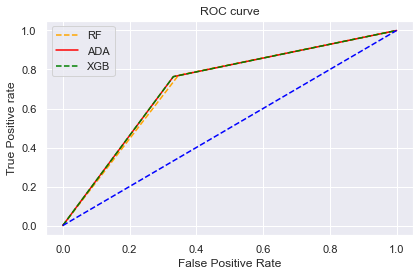

In [74]:
#ROC
#ROC CURVE FOR TPR = FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#PLOT FOR ROC CURVE
fpr1, tpr1, thresh1 = roc_curve(y_test,model_pred_label('RF')['PRED'], pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RF')

fpr2, tpr2, thresh2 = roc_curve(y_test,model_pred_label('ADA')['PRED'], pos_label=1)
plt.plot(fpr2, tpr2, color='red', label='ADA')

fpr3, tpr3, thresh3 = roc_curve(y_test,model_pred_label('XGB')['PRED'], pos_label=1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#TITLE
plt.title('ROC curve')
#X LABEL
plt.xlabel('False Positive Rate')
#Y LABEL
plt.ylabel('True Positive rate')

plt.legend(loc='best')
save_fig("roc curve")

# Hyperparameter Tunning
- Selected Algo: AdaBoost - use accuracy as the key performance metrics
- Select Base Estimator for AdaBoost
- Random Search followed by grid search

In [75]:
# adab.get_params()

# ADABOOST WITH DIFFERENT BASE ESTIMATOR

In [76]:
#https://stackoverflow.com/questions/27107205/sklearn-ensemble-adaboostclassifier-cannot-accecpt-svm-as-base-estimator
ada_base = AdaBoostClassifier()
ada_deci = AdaBoostClassifier(DecisionTreeClassifier())
# ada_deci = AdaBoostClassifier(ExtraTreesClassifier())
ada_logr = AdaBoostClassifier(LogisticRegression())
#Support Vector Machine does not nominally predict class probabilities
#LinearSVC cannot predict class probabilities (required by default algorithm used by AdaBoostClassifier) 
ada_svml = AdaBoostClassifier(SVC(probability=True))

def fill_results_df(mod_list, name_list, scoring_list, X, y):
    
    results = pd.DataFrame(index=name_list)
    for score in scoring_list:
        sc_mean = '{}_mean'.format(score)
        sc_std = '{}_std'.format(score)
        for name, model in zip(name_list, mod_list):
            cv_estimate = cross_val_score(model, X, y, cv=skf, scoring= 'accuracy', n_jobs=-1)
            mean, std = np.mean(cv_estimate), np.std(cv_estimate)
            results.loc[name, sc_mean] = mean
            results.loc[name, sc_std] = std
    
    return results

# models = [ada_base, ada_deci, ada_logr, ada_svml]
# model_names = ['Base', 'DecisonTree', 'LogisticRegression', 'SVM']
# s = ['Accuracy']
# r = fill_results_df(models, model_names, s, X_train, y_train)
# print('Results from untuned classifiers with different base estimators :')
# r

# RANDOM SEARCH

In [77]:
#https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
# ['%.2f' % elem for elem in list(np.arange(0.01,0.8,0.005))]

#HYPERPARAMTER
#DEFINE THE RANDOM SEARCH SPACE
start_time = time.time()
space = dict()
space['algorithm'] = ['SAMME','SAMME.R']
space['learning_rate'] = list(np.arange(0.01,0.8,0.05))
space['n_estimators'] = list(range(1,7000,50))

#DEFINE THE SEARCH
search = RandomizedSearchCV(AdaBoostClassifier(LogisticRegression()),
                            n_iter = 50,
                            param_distributions = space,
                            scoring='accuracy',
                            n_jobs=-1,
                            cv=skf,
                            random_state=1)
#EXECUTE THE SEARCH
random_result = search.fit(X_train, y_train)
#SUMMARIZED THE RESULT
print('Best Score: %s' % random_result.best_score_)
print('Best Hyperparameters: %s' % random_result.best_params_)
running_time = (time.time() - start_time)/60
print('Running Time: %s' % running_time)

#EXPORT THE RANDOM SEARCH RESULT TO CSV
means = random_result.cv_results_['mean_test_score']
params = random_result.cv_results_['params']
ramdom_output = pd.DataFrame(zip(means,params), columns=['Accuracy', "Hyperparamnter"])
ramdom_output = ramdom_output.sort_values(['Accuracy'], ascending=False)
ramdom_output.to_csv("random_search.csv")
FileLink("random_search.csv")

Best Score: 0.7252682717446444
Best Hyperparameters: {'n_estimators': 6901, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Running Time: 20.941740282376607


C:\Users\chien\OneDrive\Credit Score\Script\random_search.csv

# GRID SEARCH

In [78]:
#EVALUATE A GIVEN MODEL USING 5 FOLD STARTIFIED CV
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=skf, scoring= 'accuracy', n_jobs=-1)
    return scores

MODEL 0.01 0.709 (0.005)
MODEL 0.05 0.709 (0.004)
MODEL 0.1 0.710 (0.004)
MODEL 0.3 0.718 (0.004)
MODEL 0.5 0.722 (0.004)
MODEL 0.8 0.722 (0.004)


{'whiskers': [<matplotlib.lines.Line2D at 0x222c791cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x222c2583610>,
 'boxes': [<matplotlib.lines.Line2D at 0x222c791cbb0>,
 'medians': [<matplotlib.lines.Line2D at 0x222c2583cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x222c258a3d0>,
 'means': [<matplotlib.lines.Line2D at 0x222c258a070>,
  <matplotlib.lines.Line2D at 0x222c25cda00>]}

Text(0.5, 0, 'LEARNING RATE')

Text(0, 0.5, 'ACCURACY')

Saving figure LEARNING RATE


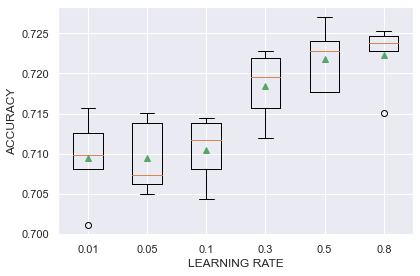

In [79]:
#LEARNING RATE
#DEFINE NUMBER OF LR TO CONSIDER
lr_results = []
lr_models = dict()
lr = [0.01, 0.05, 0.1, 0.3, 0.50, 0.8]

for n in range(len(lr)):
    #MODEL
    lr_models[str(lr[n])] = AdaBoostClassifier(base_estimator = LogisticRegression(),learning_rate=lr[n])
    md = lr_models[str(lr[n])]
    #MODEL PERFORMANCE
    score = evaluate_model(md, X_train, y_train)
    lr_results.append(score)
    #SUMMARIZED THE PERFORMANCE ALONG THE WAY
    print('MODEL %s %.3f (%.3f)' % (lr[n], np.mean(score), np.std(score)))
    
#PLOT THE PERFORMANCE FOR COMPARISON
plt.boxplot(lr_results, labels=lr, showmeans=True)
#X LABEL
plt.xlabel('LEARNING RATE')
#Y LABEL
plt.ylabel('ACCURACY')
#SAVE THE FIGURE
save_fig("LEARNING RATE")
plt.show()

MODEL 150 0.724 (0.005)
MODEL 500 0.724 (0.006)
MODEL 1000 0.723 (0.006)
MODEL 2500 0.723 (0.006)
MODEL 5000 0.723 (0.006)
MODEL 10000 0.723 (0.006)


{'whiskers': [<matplotlib.lines.Line2D at 0x222ca145610>,
 'caps': [<matplotlib.lines.Line2D at 0x222ca145d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ca1452e0>,
 'medians': [<matplotlib.lines.Line2D at 0x222ca13a3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x222ca13ab50>,
 'means': [<matplotlib.lines.Line2D at 0x222ca13a760>,
  <matplotlib.lines.Line2D at 0x222ca1590a0>]}

Text(0.5, 0, 'N_ESTIMATORS')

Text(0, 0.5, 'ACCURACY')

Saving figure N_ESTIMATORS


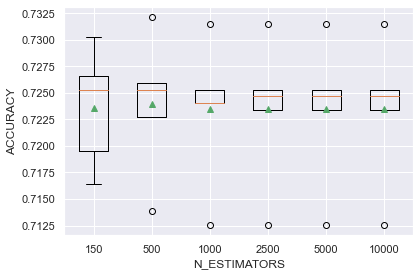

In [97]:
#ESTIMATOR
#DEFINE NUMBER OF ESTIMATOR TO CONSIDER
est_results = []
est_models = dict()
est = [150, 500, 1000, 2500, 5000, 10000]

for n in range(len(est)):
    #MODEL
    est_models[str(est[n])] = AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators=est[n])
    md = est_models[str(est[n])]
    #MODEL PERFORMANCE
    score = evaluate_model(md, X_train, y_train)
    est_results.append(score)
    #SUMMARIZED THE PERFORMANCE ALONG THE WAY
    print('MODEL %s %.3f (%.3f)' % (est[n], np.mean(score), np.std(score)))
    
#PLOT THE PERFORMANCE FOR COMPARISON
plt.boxplot(est_results, labels=est, showmeans=True)
#X LABEL
plt.xlabel('N_ESTIMATORS')
#Y LABEL
plt.ylabel('ACCURACY')
save_fig("N_ESTIMATORS")
plt.show()

MODEL SAMME 0.715 (0.006)
MODEL SAMME.R 0.724 (0.003)


{'whiskers': [<matplotlib.lines.Line2D at 0x222ca168460>,
 'caps': [<matplotlib.lines.Line2D at 0x222ca168b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ca168100>,
 'medians': [<matplotlib.lines.Line2D at 0x222ca170220>,
 'fliers': [<matplotlib.lines.Line2D at 0x222ca1708e0>,
 'means': [<matplotlib.lines.Line2D at 0x222ca170580>,
  <matplotlib.lines.Line2D at 0x222ca178f70>]}

Text(0.5, 0, 'BOOSTING ALGORITHM')

Text(0, 0.5, 'ACCURACY')

Saving figure BOOSTING ALGORITHM


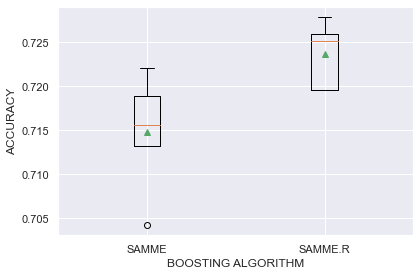

In [98]:
#BOOSTING ALGORITHM
#DEFINE BOOSTING ALGORITHM TO CONSIDER
boost_results = []
boost_models = dict()
boost = ['SAMME', 'SAMME.R']

for n in range(len(boost)):
    #MODEL
    boost_models[str(boost[n])] = AdaBoostClassifier(base_estimator = LogisticRegression(),algorithm=boost[n])
    md = boost_models[str(boost[n])]
    #MODEL PERFORMANCE
    score = evaluate_model(md, X_train, y_train)
    boost_results.append(score)
    #SUMMARIZED THE PERFORMANCE ALONG THE WAY
    print('MODEL %s %.3f (%.3f)' % (boost[n], np.mean(score), np.std(score)))
    
#PLOT THE PERFORMANCE FOR COMPARISON
plt.boxplot(boost_results, labels=boost, showmeans=True)
#X LABEL
plt.xlabel('BOOSTING ALGORITHM')
#Y LABEL
plt.ylabel('ACCURACY')
#SAVE THE FIGURE
save_fig("BOOSTING ALGORITHM")
plt.show()

In [99]:
#https://stats.stackexchange.com/questions/169260/cross-validation-what-is-the-standard-deviation-if-the-same-value-is-obtained-f
#GRID SEARCH
start_time = time.time()
grid_space = dict()
grid_space['algorithm'] = ['SAMME.R']
grid_space['learning_rate'] = [0.1,0.3,0.5,0.8]
grid_space['n_estimators'] = [100, 1000, 5000, 10000]

com = 1
for x in grid_space.values():
    com *= len(x)
print('There are {} combinations'.format(com))

# #DEFINE THE SEARCH
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(LogisticRegression()),
                                    param_grid = grid_space,
                                    scoring='accuracy',
                                    cv=skf,
                                    n_jobs=-1)
                        
# #EXECUTE THE SEARCH
grid_result = grid_search_adaboost.fit(X_train, y_train)

#SUMMARIZED THE RESULT
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)
running_time = (time.time() - start_time)/60
print('Running Time: %s' % running_time)

There are 16 combinations
Best Score: 0.724631004409412
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 100}
Running Time: 16.64672344525655


# Model Fitting

In [100]:
def type_1_rt (y_true, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_true, y_pred,labels=[1,0]).reshape(-1)
    type1 = round(fp/tn*100,2)
    return type1

def type_2_rt (y_true, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_true, y_pred,labels=[1,0]).reshape(-1)
    type2 = round(fn/tp*100,2)
    return type2

def ada_train(model, metrics):
    result = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=skf,
                             scoring= metrics,
                             n_jobs=-1)
    return result

# Grid Search Model

In [101]:
#TRAINING

#PERFORMANCE METRICS
scoring_lst = ['accuracy', 'type1', 'type2']

#DATAFRAME TO STORE THE TRAINING RESULT 
ada_result = pd.DataFrame()
# ada_result['METRICS'] = scoring_lst
ada_result['TRAIN'] = 0

scoring_result = []
for i in range(len(scoring_lst)):
    if scoring_lst[i] == 'accuracy':
        scoring_result.append(ada_train(grid_search_adaboost.best_estimator_, 'accuracy'))
    elif scoring_lst[i] == 'type1':
        scoring_result.append(ada_train(grid_search_adaboost.best_estimator_, make_scorer(type_1_rt)))
    else:
        scoring_result.append(ada_train(grid_search_adaboost.best_estimator_, make_scorer(type_2_rt)))
    print('Train result for',scoring_lst[i], ':')
    print(scoring_result[i])
    ada_result.loc[scoring_lst[i], 'TRAIN'] = scoring_result[i].mean()  

Train result for accuracy :
[0.71829191 0.71829191 0.72785214 0.72848948 0.73022959]
Train result for type1 :
[52.13 45.91 47.35 47.35 45.63]
Train result for type2 :
[29.18 33.61 29.38 29.18 29.84]


In [102]:
#TESTING
ada_test_5cv = 0

final_test_result = pd.DataFrame()
final_test_result['ACTUAL'] = y_test

cnt = 1
for train_index, test_index in skf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    X_tn = X_train.iloc[train_index]
    y_tn = y_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_val = y_train.iloc[test_index]
 
    grid_search_adaboost.best_estimator_.fit(X_tn,y_tn)
    ada_test_prob = grid_search_adaboost.best_estimator_.predict_proba(X_test)[:,1]
    ada_test_5cv += ada_test_prob/no_of_fold
    final_test_result['ADA_PROB'] = ada_test_5cv

Fold:1, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.8,
                   n_estimators=100)

Fold:2, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.8,
                   n_estimators=100)

Fold:3, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.8,
                   n_estimators=100)

Fold:4, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.8,
                   n_estimators=100)

Fold:5, Train set: 6276, Test set:1568


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.8,
                   n_estimators=100)

In [103]:
#TESTING RESULT
test_result = []

#PREDICTED LABLE
final_test_result['PRED'] = np.int32(final_test_result["ADA_PROB"] > 0.5)
#ACCURACY SCORE
test_result.append(metrics.accuracy_score(y_test, final_test_result['PRED']))

tp, fn, fp, tn = confusion_matrix(y_test, final_test_result['PRED'],labels=[1,0]).reshape(-1)
#TYPE 1 ERROR
test_result.append(round(fp/tn*100,2))
#TYPE 2 ERROR
test_result.append(round(fn/tp*100,2))

#ADD THE RESULT TO TRAIN RESULT DATAFRAME
ada_result['TEST'] = test_result
ada_result

,TRAIN,TEST
accuracy,0.724631,0.717782
type1,47.674000,50.060000
type2,30.238000,30.750000


# Random Search Model

In [104]:
#TRAINING

#PERFORMANCE METRICS
scoring_lst = ['accuracy', 'type1', 'type2']

#DATAFRAME TO STORE THE TRAINING RESULT 
ada_result = pd.DataFrame()
# ada_result['METRICS'] = scoring_lst
ada_result['TRAIN'] = 0

scoring_result = []
for i in range(len(scoring_lst)):
    if scoring_lst[i] == 'accuracy':
        scoring_result.append(ada_train(random_result.best_estimator_, 'accuracy'))
    elif scoring_lst[i] == 'type1':
        scoring_result.append(ada_train(random_result.best_estimator_, make_scorer(type_1_rt)))
    else:
        scoring_result.append(ada_train(random_result.best_estimator_, make_scorer(type_2_rt)))
    print('Train result for',scoring_lst[i], ':')
    print(scoring_result[i])
    ada_result.loc[scoring_lst[i], 'TRAIN'] = scoring_result[i].mean()

Train result for accuracy :
[0.7208413  0.7195666  0.72721479 0.72912683 0.72959184]
Train result for type1 :
[51.52 45.63 47.64 47.35 45.91]
Train result for type2 :
[28.77 33.39 29.38 28.98 29.84]


In [105]:
#TESTING
ada_test_5cv = 0

final_test_result = pd.DataFrame()
final_test_result['ACTUAL'] = y_test

cnt = 1
for train_index, test_index in skf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    X_tn = X_train.iloc[train_index]
    y_tn = y_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_val = y_train.iloc[test_index]
 
    random_result.best_estimator_.fit(X_tn,y_tn)
    ada_test_prob = random_result.best_estimator_.predict_proba(X_test)[:,1]
    ada_test_5cv += ada_test_prob/no_of_fold
    final_test_result['ADA_PROB'] = ada_test_5cv

Fold:1, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=6901)

Fold:2, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=6901)

Fold:3, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=6901)

Fold:4, Train set: 6275, Test set:1569


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=6901)

Fold:5, Train set: 6276, Test set:1568


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=6901)

In [106]:
#TESTING RESULT
test_result = []

#PREDICTED LABLE
final_test_result['PRED'] = np.int32(final_test_result["ADA_PROB"] > 0.5)
#ACCURACY SCORE
test_result.append(metrics.accuracy_score(y_test, final_test_result['PRED']))

tp, fn, fp, tn = confusion_matrix(y_test, final_test_result['PRED'],labels=[1,0]).reshape(-1)
#TYPE 1 ERROR
test_result.append(round(fp/tn*100,2))
#TYPE 2 ERROR
test_result.append(round(fn/tp*100,2))

#ADD THE RESULT TO TRAIN RESULT DATAFRAME
ada_result['TEST'] = test_result
ada_result

,TRAIN,TEST
accuracy,0.725268,0.716635
type1,47.610000,50.240000
type2,30.072000,31.000000


# Predicted Output

In [107]:
final_test_result.to_csv("predicted_output.csv")
FileLink("predicted_output.csv")

C:\Users\chien\OneDrive\Credit Score\Script\predicted_output.csv

# GLOBAL EXPLANATION

In [108]:
final_test_result = pd.read_csv("predicted_output.csv")
final_test_result.head(2)

,Unnamed: 0,ACTUAL,ADA_PROB,PRED
0,7355,0,0.503181,1
1,5950,0,0.492907,0


In [109]:
#DECISION TREE FEATURE SCORES
dt = DecisionTreeClassifier(random_state=0).fit(X_test, final_test_result['PRED'])
features = pd.DataFrame(dt.feature_importances_,columns=['DT'],index=X_test.columns).reset_index().sort_values(['DT'], ascending=False)
features.to_csv("feature_scores.csv", index = False)
FileLink("feature_scores.csv")

C:\Users\chien\OneDrive\Credit Score\Script\feature_scores.csv

In [118]:
#SELECTED VARIABLE FOR DT TRAINING FOR EXPLANATIONS
# L = [str(x) for x in X_test.index]
# sel_var = ['ExternalRiskEstimate','AverageMInFile','MTH_SINCE_RECENT_INQ']
# df = woe_train_data.iloc[L][sel_var]
#LABEL ENCODING
# {col: {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)} 
#      for col in df}
# X_test_2_df = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
# X_test_2_df = X_test_2_df.join(pred_label)

In [127]:
##SELECTED VARIABLE FOR DT TRAINING FOR EXPLANATIONS
sel_var = ['ExternalRiskEstimate','AverageMInFile','MTH_SINCE_RECENT_INQ']
X_test_2 = X_test[sel_var]
dt2 = DecisionTreeClassifier(random_state=0)
dt2 = dt2.fit(X_test_2,final_test_result['PRED'])

True

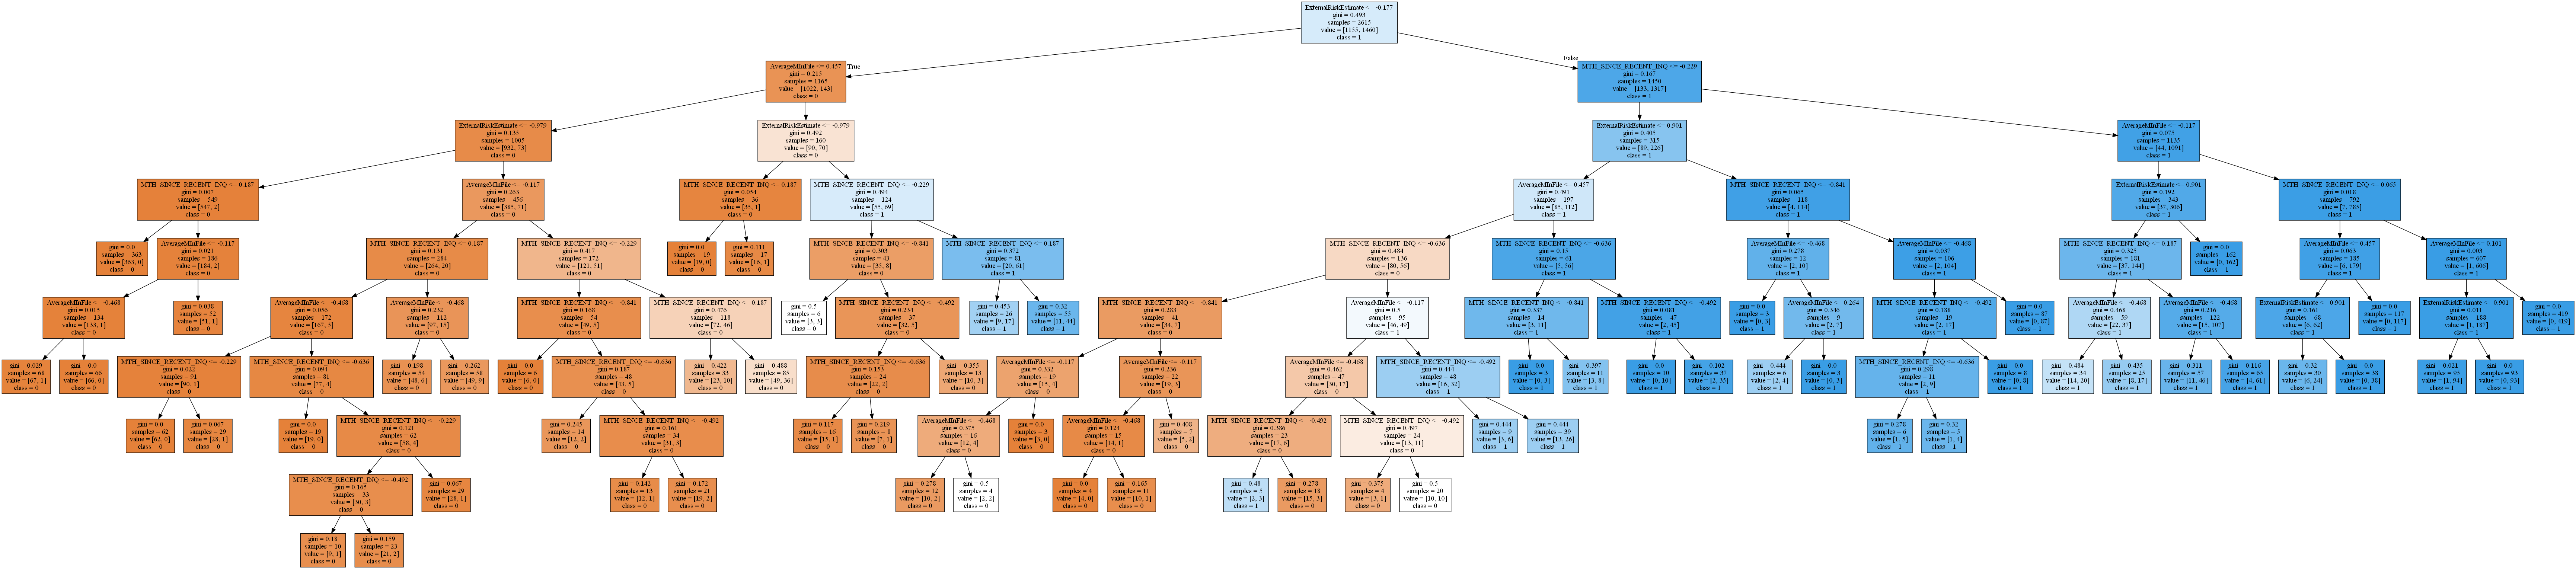

In [128]:
dot_data = StringIO()
export_graphviz(dt2, out_file=dot_data,  
                filled=True,
                feature_names = X_test_2.columns,
                class_names=['0','1'])

#https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz\bin/'
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(image_path + 'decision_tree.png')
Image(graph.create_png())

In [129]:
pred_label = final_test_result['PRED']
# {col: {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)} 
#      for col in df}
# X_test_2_df = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
X_test_2_df = X_test_2.join(pred_label)
pred_label.index = X_test_2_df.index
evaluation = X_test_2.join(pred_label)

conditions = [
    (evaluation['ExternalRiskEstimate'] >= -0.177),
    (evaluation['ExternalRiskEstimate'] >= -0.177) & (evaluation['AverageMInFile'] <= 0.457) &
    (evaluation['MTH_SINCE_RECENT_INQ'] <= -0.229)
    ]

values = [1, 1]
evaluation['GLOBAL_PRED'] = np.select(conditions, values)
evaluation.head(3)

,ExternalRiskEstimate,AverageMInFile,MTH_SINCE_RECENT_INQ,PRED,GLOBAL_PRED
7355,0.454916,0.837677,0.371110,1,1
5950,-1.477371,-0.627778,0.002401,0,0
4926,-1.477371,-0.627778,-0.934119,0,0


In [126]:
tp, fn, fp, tn = confusion_matrix(evaluation['PRED'],evaluation['GLOBAL_PRED'],labels=[1,0]).reshape(-1)
#TYPE 1 ERROR RATE
print('Type 1 error rate : ', round(fp/tn*100,2))
    
#TYPE 2 ERROR RATE
print('Type 2 error rate : ', round(fn/tp*100,2))
    
#ACCURACY
print("Accuracy:",metrics.accuracy_score(evaluation['PRED'],evaluation['GLOBAL_PRED']))

Type 1 error rate :  13.01
Type 2 error rate :  10.86
Accuracy: 0.8944550669216061


In [ ]:
#lOGISTIC REGRESSION
# lr = LogisticRegression(random_state=0).fit(X_test, final_test_result['PRED'])
# lr_df = pd.DataFrame(np.transpose(lr.coef_).tolist(), columns=['coef'])
# lr_df['var'] = X_test.columns

In [ ]:
# import random
# import pickle

# %run regression_tree_cart_general.py

In [ ]:
#PREPARE DATA FOR DM_TXT
# dm = pd.DataFrame()
# dm['pid_visit'] = final_test_result.index
# dm['lbl_visit'] = final_test_result['PRED']
# dm = dm.fillna(0)

In [ ]:
#PREPARE DATA FOR DF_TXT
# df = X_test.reset_index()
# df.rename(columns={'index':'pid_contrb'}, inplace=True)
# df = df.melt(id_vars=["pid_contrb"], 
#              var_name="var", 
#              value_name="woe").sort_values(by=['pid_contrb'])
# df = pd.merge(df,lr_df, how='left', on=['var'])
# df['ctb_contrb'] = df['woe']*df['coef']
# df.drop(['woe','coef'], axis =1, inplace=True)

In [ ]:
#INPUT FOR GIRP
# dm = dm[['pid_visit','lbl_visit']]
# df_grp = df.groupby(['pid_contrb','var']).sum().reset_index()
# df = df_grp[['pid_contrb','ctb_contrb','var']]
# df['val'] = 1
# df['Unnamed: 0']=df.index
# id_p = list(set(df['pid_contrb']))

In [ ]:
# trs, min_tr = cvt(df, dm, id_p, max_depth = 100,  Nmin = 10)

# trs[min_tr].display_tree(save = True, filename = 'selected_tree.jpg', view=False,height=3000, width=5000)